# TABLE OF CONTENTS

* [1. SETUP](#section-one)
* [2. GENERATING PRICE PATHS WITH MONTE CARLO SIMULATION](#section-two)
* [3. VISUALIZING THE SIMULATED PRICE PATHS AND PAYOFFS](#section-three)
    - [3.1 Question 1: How do the simulated price paths look like?](#subsection-three-one)
    - [3.2 Question 2: How does the distribution of the simulated security prices at maturity look like?](#subsection-three-two)
    - [3.3 Question 3: How does the distribution of the simulated option payoffs at maturity look like?](#subsection-three-three)
* [4. PUT OPTION SIMULATION](#section-four)
* [5. COMPARING TRADED OPTION PRICE WITH SIMULATED AND MODELLED PRICING](#section-five)
* [6. FINDING THE VALUE OF ASIAN PUT & CALL OPTIONS](#section-six)
* [7. REFERENCES](#section-seven)

<a id="section-one"></a>
# 1. SETUP

In [1]:
import math
from numpy import *
import datetime
import matplotlib.pyplot as plt

<a id="section-two"></a>
# 2. GENERATING PRICE PATHS WITH MONTE CARLO SIMULATION

In [30]:
random.seed(1)

# Parameters
T = (datetime.date(2013,9,30) - datetime.date(2013,9,1)).days / 365.0  # time to maturity
S0 = 100.   # underlying price at time 0
K = 105.    # strike price
r = 0.0065  # risk-free rate
sigma = 0.2 # return volatility of the underlying security
M = 30      # time steps
dt = T / M  # time increment
I = 250000  # the number of simulations

# Simulating I paths with M time steps following Geometric Brownian Motion
# Method standard_normal draws samples from a standard Normal distribution (mean=0, stdev=1)
# The arguments (time steps, the number of simulations) maps out the price paths for all simulations
S = S0 * exp(cumsum((r - 0.5 * sigma ** 2) * dt
+ sigma * math.sqrt(dt)
* random.standard_normal((M + 1, I)), axis=0))

# Initiating the price of the underlying at time 0
S[0] = S0

# Calculating the Monte Carlo estimatorn
C0 = math.exp(-r * T) * sum(maximum(S[-1] - K, 0)) / I

print('The European Option Value is: ', C0)  # The European Option Value is:  0.6527

The European Option Value is:  0.6527473693729077


** How should you modify S if you are only interested at the final values (i.e., the prices of the underlying security at maturity)?  
sum instead of cumsum would also do if only the final values are of interest

The matrix S, underlying security price, is structured as S[time step][simulation]

In [3]:
S[0][249999]

100.0

At time 0, price is S0 as defined for all simulations.

<a id="section-three"></a>
# 3. VISUALIZING THE SIMULATED PRICE PATHS AND PAYOFFS

<a id="section-three-one"></a>
## 3.1 How do the simulated price paths look like?

Let's plot the price paths for the first 1000 simulations. S[:, :1000] basically says "show me the full price path for the first 1000 simulations."

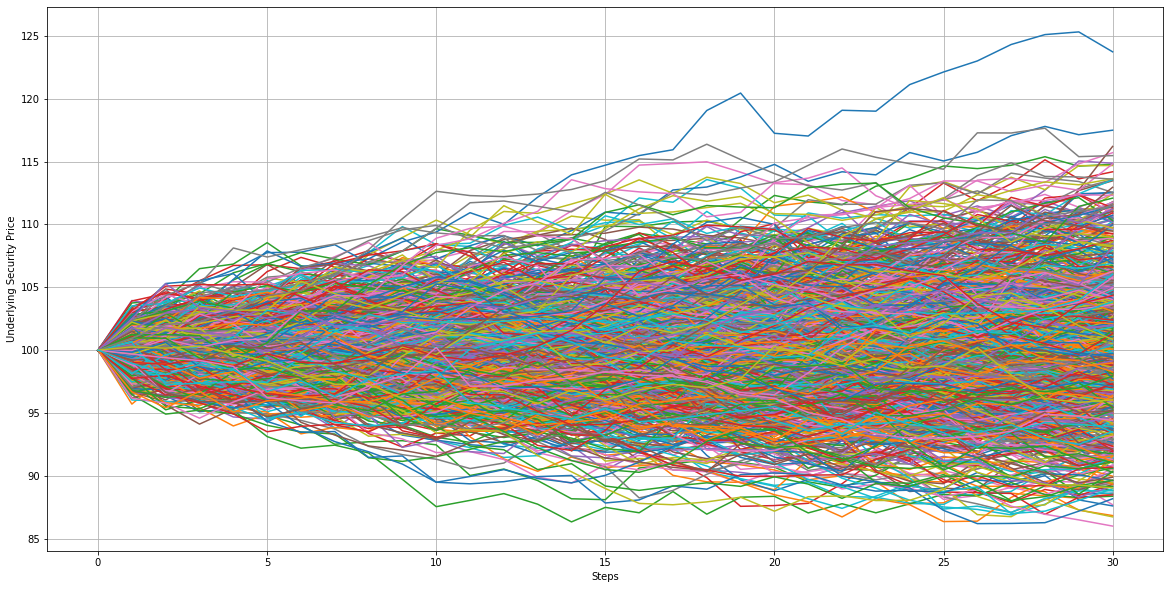

In [4]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(S[:, :1000])
plt.grid(True)
plt.xlabel('Steps')
plt.ylabel('Underlying Security Price')
plt.show()

<a id="section-three-two"></a>
## 3.2 How does the distribution of the simulated security prices at maturity look like?

Text(0, 0.5, 'Frequency')

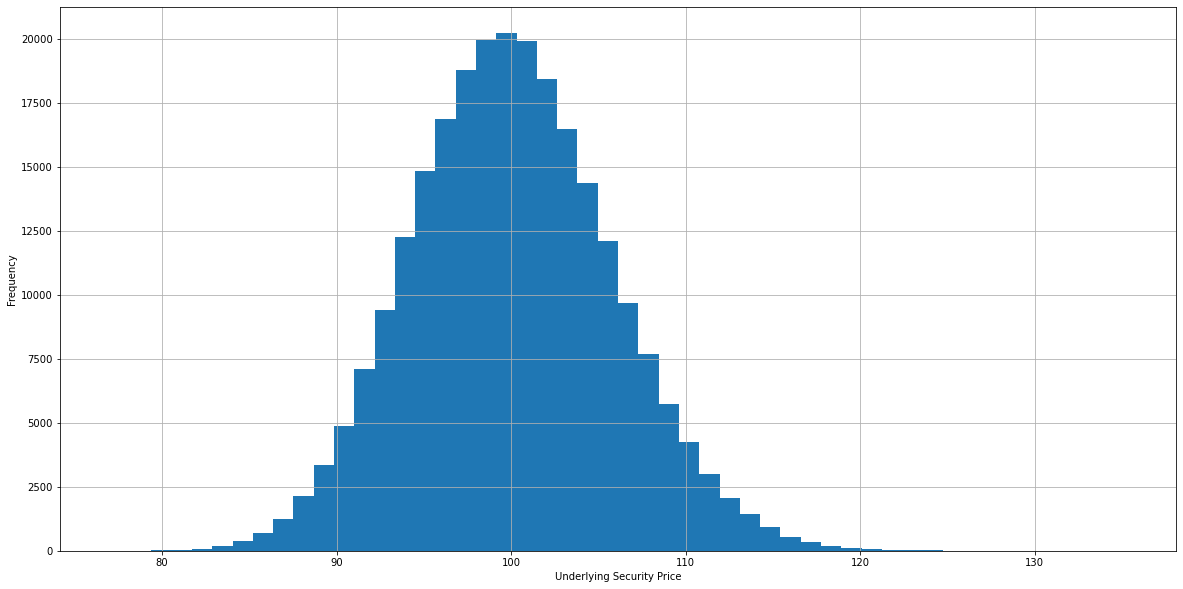

In [5]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(S[-1], bins=50)
plt.grid(True)
plt.xlabel('Underlying Security Price')
plt.ylabel('Frequency')

<a id="section-three-three"></a>
## 3.3 How does the distribution of the simulated option payoffs at maturity look like?

(0.0, 250000.0)

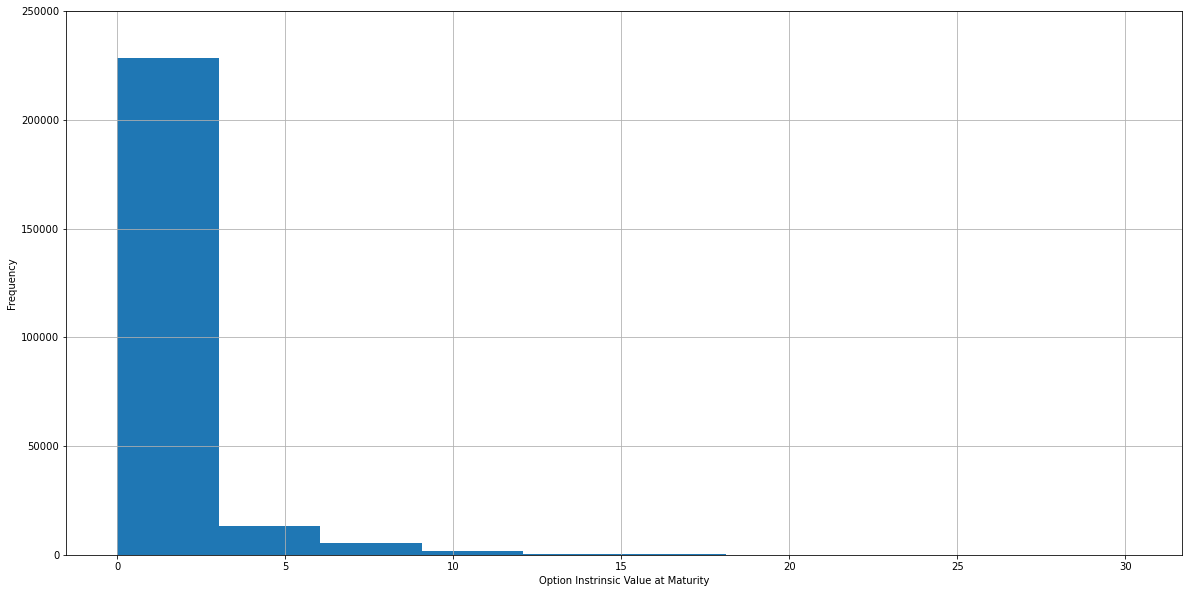

In [6]:
plt.rcParams["figure.figsize"] = (20,10)
plt.hist(maximum(S[-1] - K, 0), bins=10)
plt.grid(True)
plt.xlabel('Option Instrinsic Value at Maturity')
plt.ylabel('Frequency')
plt.ylim(0, I)

<a id="section-four"></a>
# 4. PUT OPTION SIMULATION

In [140]:
import math
from numpy import *
import datetime
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as si

In [141]:
random.seed(1)
#Keeping the montecarlo the same but changing payoff for put option


# Parameters
T = (datetime.date(2013,9,30) - datetime.date(2013,9,1)).days / 365.0  # time to maturity
S0 = 100.   # underlying price at time 0
K = 105.    # strike price
r = 0.0065  # risk-free rate
sigma = 0.2 # return volatility of the underlying security
M = 30      # time steps
dt = T / M  # time increment
I = 250000  # the number of simulations

# Simulating I paths with M time steps following Geometric Brownian Motion
# Method standard_normal draws samples from a standard Normal distribution (mean=0, stdev=1)
# The arguments (time steps, the number of simulations) maps out the price paths for all simulations
S = S0 * exp(cumsum((r - 0.5 * sigma ** 2) * dt
+ sigma * math.sqrt(dt)
* random.standard_normal((M + 1, I)), axis=0))

# Initiating the price of the underlying at time 0
S[0] = S0

C0 = math.exp(-r * T) * sum(maximum(S[-1] - K, 0)) / I

print('The European Option Value is: ', C0)  # The European Option Value is:  0.6527

# Calculating the Monte Carlo estimator (put option)
P0 = math.exp(-r * T) * sum(maximum(K - S[-1], 0)) / I

print('The European Put Option Value is: ', P0) 

The European Option Value is:  0.6527473693729077
The European Put Option Value is:  5.603845533283632


## With black scholes

In [142]:
#Define paramters

T = (datetime.date(2013,9,30) - datetime.date(2013,9,1)).days / 365.0  # time to maturity
S0 = 100.   # underlying price at time 0
K = 105.    # strike price
r = 0.0065  # risk-free rate
sigma = 0.2 # return volatility of the underlying security

d1 = (np.log(S0/K) + (r +0.5*sigma **2) * T) /(sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

BSMP0 = (K * np.exp(-r*T)) * si.norm.cdf(-d2,0,1) - S0 * si.norm.cdf(-d1,0,1)
BSMC0 = S0 * si.norm.cdf(d1,0,1) - (K * np.exp(-r*T)) * si.norm.cdf(d2,0,1)

print('The Black Scholes Model European Put Option Value is: ', BSMP0) 
print('The Black Scholes Model European Call Option Value is: ', BSMC0) 

The Black Scholes Model European Put Option Value is:  5.57357832201275
The Black Scholes Model European Call Option Value is:  0.6277903496199073


In [143]:
print('The difference between the simulated put and BSM put is: ', round(P0-BSMP0,3))
print('The difference between the simulated put and BSM call is: ', round(C0-BSMC0,3))
print('The prices are largely similar.')

The difference between the simulated put and BSM put is:  0.03
The difference between the simulated put and BSM call is:  0.025
The prices are largely similar.


<a id="section-five"></a>
# 5. Comparing traded option price with simulated and modelled pricing

In [144]:
# I:SPX Mar 2021 3400.000 call | Current Price 211 | Implied Vol 24.33%

# Parameters
T = (datetime.date(2021,3,31) - datetime.date(2020,9,30)).days / 365.0  # time to maturity
S0 = 3400   # Current S&P price
K = 3500    # strike price
r = 0.0065  # risk-free rate
sigma = 0.33 # annualised volatility of S&P from past 1 year
M = 30      # time steps
dt = T / M  # time increment
I = 250000  # the number of simulations

In [145]:
# Simulating I paths with M time steps following Geometric Brownian Motion
# Method standard_normal draws samples from a standard Normal distribution (mean=0, stdev=1)
# The arguments (time steps, the number of simulations) maps out the price paths for all simulations
S = S0 * exp(cumsum((r - 0.5 * sigma ** 2) * dt
+ sigma * math.sqrt(dt)
* random.standard_normal((M + 1, I)), axis=0))

# Initiating the price of the underlying at time 0
S[0] = S0

C0 = math.exp(-r * T) * sum(maximum(S[-1] - K, 0)) / I

print('The European Option Value is: ', round(C0,2))

The European Option Value is:  283.63


In [146]:
#With black scholes

d1 = (np.log(S0/K) + (r +0.5*sigma **2) * T) /(sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

BSMC0 = S0 * si.norm.cdf(d1,0,1) - (K * np.exp(-r*T)) * si.norm.cdf(d2,0,1)

print('The Black Scholes Model European Call Option Value is: ', round(BSMC0,2)) 

The Black Scholes Model European Call Option Value is:  277.08


Based on the theoretical prices, they are higher than current market pricing. This means that the historical volatility of the S&P500 is higher than the implied volatility of the option. It implies that the market expects S&P to be less volatile compared to historically going forward or that the current option is selling at a discount

<a id="section-six"></a>
# 6. Finding the Value of Asian Put & Call Options

In [149]:
#Difference between Asian and European Option is that the payoff is dependent on the average instead of the price at maturity

#Hence we want to use an average of the entire time step instead of the final point

# we will use the given parameters in the notebook

# Parameters
T = (datetime.date(2013,9,30) - datetime.date(2013,9,1)).days / 365.0  # time to maturity
S0 = 100.   # underlying price at time 0
K = 105.    # strike price
r = 0.0065  # risk-free rate
sigma = 0.2 # return volatility of the underlying security
M = 30      # time steps
dt = T / M  # time increment
I = 250000  # the number of simulations

# Simulating I paths with M time steps following Geometric Brownian Motion
# Method standard_normal draws samples from a standard Normal distribution (mean=0, stdev=1)
# The arguments (time steps, the number of simulations) maps out the price paths for all simulations
S = S0 * exp(cumsum((r - 0.5 * sigma ** 2) * dt
+ sigma * math.sqrt(dt)
* random.standard_normal((M + 1, I)), axis=0))

# Initiating the price of the underlying at time 0
S[0] = S0
#Finding average price in each iteration
averageS = S.mean(axis=0)

# Calculating the Monte Carlo estimator but payoff is for averageprice
callsum = 0 
putsum = 0
for i in range(int(shape(averageS)[0])):
    callsum += math.exp(-r * T) * (maximum(averageS[i] - K,0))
    putsum += math.exp(-r * T) * (maximum(K - averageS[i],0))

C0 = callsum/I
P0 = putsum/I

print('The Asian Call Option Value is: ', C0) 
print('The Asian Put Option Value is: ', P0) 


The Asian Call Option Value is:  0.11861519522843957
The Asian Put Option Value is:  5.096105471780022


<a id="section-seven"></a>
# 7. REFERENCES

Hilpisch, Y. (2015). Python for Finance: Analyze Big Financial Data

It appears that the Asian options are cheaper than the European options for both call and put. This is likely because as the Asian option takes an average instead of final value, values that deviate further from the strike are being averaged out and hence the payoff is lesser, resulting in a cheaper option price.